In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
#import data test and train to df 
df_test = pd.read_csv('test_data.csv')
df_train = pd.read_csv('Train_data.csv')

In [4]:
#get shape of data
print(df_train.shape)
print(df_test.shape)

(29020, 19)
(7255, 19)


<h1>Data Cleaning</h1>

In [5]:
#let's look for missing values
print(df_train.isnull().sum())

BookingID                  0
LeadTime                   0
ArrivalYear                0
ArrivalMonth               0
ArrivalDate                0
NumWeekendNights           0
NumWeekNights              0
MealPlan                   0
Parking                    0
RoomType                   0
NumAdults                  0
NumChildren                0
MarketSegment              0
RepeatedGuest              0
NumPrevCancellations       0
NumPreviousNonCancelled    0
AvgRoomPrice               0
SpecialRequests            0
BookingStatus              0
dtype: int64


In [6]:
#take a look at train set
df_train.head(5)

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,NumAdults,NumChildren,MarketSegment,RepeatedGuest,NumPrevCancellations,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,1,0,Corporate,0,0,0,95.00,0,Canceled
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,1,0,Online,0,0,0,61.00,0,Canceled
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,2,1,Online,0,0,0,129.75,1,Not_Canceled
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,2,0,Online,0,0,0,152.00,3,Not_Canceled
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,2,0,Offline,0,0,0,87.00,0,Not_Canceled


<h1>Summary Statistics</h1>
<p>We will start by looking at the lead time and price columns and summarizing them statistically. We will then normalize this data</p>

In [7]:
#generate summary statistics of the lead time column
df_train['LeadTime'].describe()

count    29020.000000
mean        85.276085
std         85.886439
min          0.000000
25%         17.000000
50%         57.000000
75%        127.000000
max        443.000000
Name: LeadTime, dtype: float64

In [43]:
#export the 'MarketSegment' column to a csv
df_train['MarketSegment'].to_csv('MarketSegment.csv', index=False)

In [8]:
#normalize the data
df_train['LeadTimeNormal'] = (df_train['LeadTime'] - df_train['LeadTime'].mean()) / df_train['LeadTime'].std()

<Axes: >

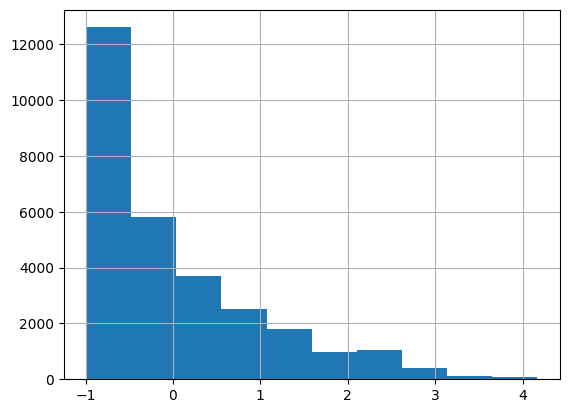

In [9]:
#histogram of lead time
df_train['LeadTimeNormal'].hist()

In [10]:
#applying the same to price 
df_train['AvgRoomPrice'].describe()

count    29020.000000
mean       103.474264
std         35.052557
min          0.000000
25%         80.750000
50%         99.865000
75%        120.127500
max        540.000000
Name: AvgRoomPrice, dtype: float64

In [11]:
#normalizing the data
df_train['AvgRoomPriceNormal'] = (df_train['AvgRoomPrice'] - df_train['AvgRoomPrice'].mean()) / df_train['AvgRoomPrice'].std()

<Axes: >

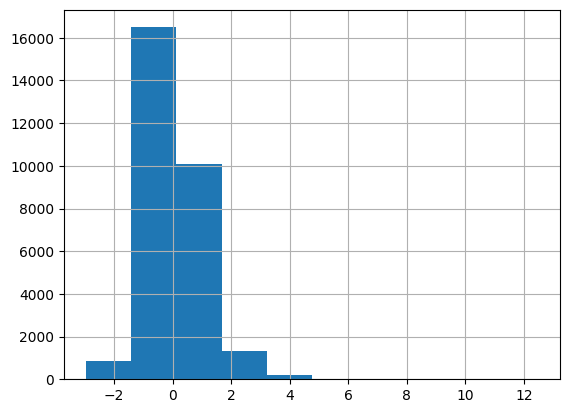

In [12]:
#let's make a histogram of AvgRoomPrice
df_train['AvgRoomPriceNormal'].hist()

<h2>Let's now look at some other columns</h2>
<ul>
<li>cancellation rates in the 2 data sets</li>
</ul>

In [13]:
#get count of is and is not in bookingStatus
df_train['BookingStatus'].value_counts()

Not_Canceled    19500
Canceled         9520
Name: BookingStatus, dtype: int64

<Axes: >

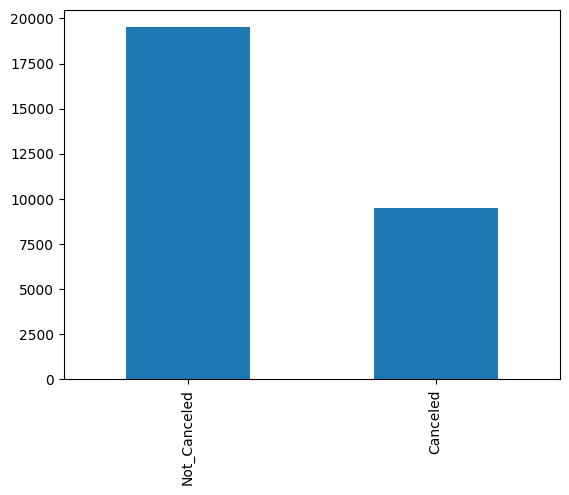

In [14]:
#plot the booking status
df_train['BookingStatus'].value_counts().plot(kind='bar')

<h1>Data Pre Processing</h1>
<p>We will want to convert all of the columns into some form of numeric representation</p>

In [15]:
#lets convert the booking status to a binary value
df_train['isCanceled'] = df_train['BookingStatus'].map({'Canceled': 1, 'Not_Canceled': 0})

<p>Meal plan column</p>

In [16]:
#look at unique values of the MealPlan
df_train['MealPlan'].unique()

array(['Meal Plan 1', 'Meal Plan 2', 'Not Selected', 'Meal Plan 3'],
      dtype=object)

<p>Let's break this down into two different data vectors to try. The first will be a column that states weather or not they have a meal plan, and the other will contain numeric codes to include the type of meal plan<p>

In [17]:
#map Not Selected to 0 and the rest to 1
df_train['hasMealPlan'] = df_train['MealPlan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 1, 'Meal Plan 3': 1})

In [18]:
#look at value counts of the meal plan
df_train['hasMealPlan'].value_counts()

1    24897
0     4123
Name: hasMealPlan, dtype: int64

In [19]:
#map Not Selected to 0 and the rest to 1
df_train['MealPlanVals'] = df_train['MealPlan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

<p>Now let's break down the room type column</p>

In [20]:
df_train['RoomType'].unique()

array(['Room_Type 1', 'Room_Type 6', 'Room_Type 4', 'Room_Type 2',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [21]:
#let's compare room type to price 
room_type_price = df_train.groupby('RoomType')['AvgRoomPrice'].mean()

<Axes: xlabel='RoomType'>

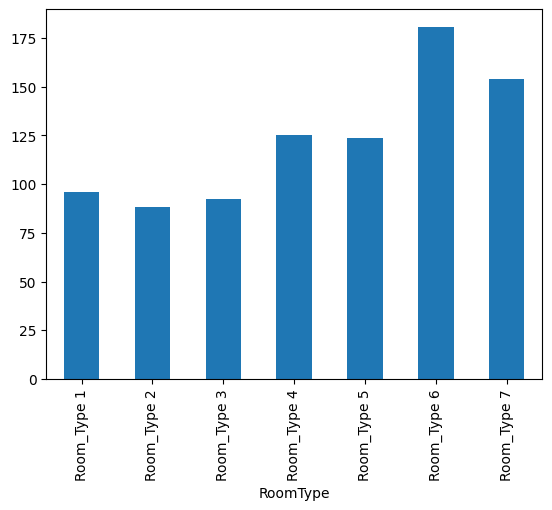

In [22]:
# plot that
room_type_price.plot(kind='bar')

In [23]:
#lets map the room type to a number
df_train['RoomTypeVals'] = df_train['RoomType'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

In [24]:
#look at value counts
df_train['RoomTypeVals'].value_counts()

1    22470
4     4877
6      766
2      561
5      215
7      127
3        4
Name: RoomTypeVals, dtype: int64

In [25]:
df_train.head()

,BookingID,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,MealPlan,Parking,RoomType,...,NumPreviousNonCancelled,AvgRoomPrice,SpecialRequests,BookingStatus,LeadTimeNormal,AvgRoomPriceNormal,isCanceled,hasMealPlan,MealPlanVals,RoomTypeVals
0,1,10,2018,3,31,0,1,Meal Plan 1,0,Room_Type 1,...,0,95.00,0,Canceled,-0.876461,-0.241759,1,1,1,1
1,2,116,2018,2,28,2,1,Meal Plan 1,0,Room_Type 1,...,0,61.00,0,Canceled,0.357727,-1.211731,1,1,1,1
2,3,11,2018,7,25,1,2,Meal Plan 1,0,Room_Type 1,...,0,129.75,1,Not_Canceled,-0.864817,0.749610,0,1,1,1
3,4,3,2017,9,12,0,1,Meal Plan 1,0,Room_Type 1,...,0,152.00,3,Not_Canceled,-0.957964,1.384371,0,1,1,1
4,5,28,2018,3,7,1,3,Meal Plan 1,0,Room_Type 1,...,0,87.00,0,Not_Canceled,-0.666882,-0.469988,0,1,1,1


In [26]:
#let's make dummy variables for the room type
room_type_dummies = pd.get_dummies(df_train['RoomType'], prefix='RoomType')
#now for meal plan
meal_plan_dummies = pd.get_dummies(df_train['MealPlan'], prefix='MealPlan')
print(room_type_dummies.head())
print(meal_plan_dummies.head())

   RoomType_Room_Type 1  RoomType_Room_Type 2  RoomType_Room_Type 3  \
0                     1                     0                     0   
1                     1                     0                     0   
2                     1                     0                     0   
3                     1                     0                     0   
4                     1                     0                     0   

   RoomType_Room_Type 4  RoomType_Room_Type 5  RoomType_Room_Type 6  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   RoomType_Room_Type 7  
0                     0  
1                     0  
2                     0  
3                     0  
4               

In [27]:
#create a train df with the dummy variables, and the normalized values, and the binary values
train_df = pd.concat([df_train, room_type_dummies, meal_plan_dummies], axis=1)

In [28]:
#let's look at the columns
train_df.columns

Index(['BookingID', 'LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'MealPlan', 'Parking', 'RoomType',
       'NumAdults', 'NumChildren', 'MarketSegment', 'RepeatedGuest',
       'NumPrevCancellations', 'NumPreviousNonCancelled', 'AvgRoomPrice',
       'SpecialRequests', 'BookingStatus', 'LeadTimeNormal',
       'AvgRoomPriceNormal', 'isCanceled', 'hasMealPlan', 'MealPlanVals',
       'RoomTypeVals', 'RoomType_Room_Type 1', 'RoomType_Room_Type 2',
       'RoomType_Room_Type 3', 'RoomType_Room_Type 4', 'RoomType_Room_Type 5',
       'RoomType_Room_Type 6', 'RoomType_Room_Type 7', 'MealPlan_Meal Plan 1',
       'MealPlan_Meal Plan 2', 'MealPlan_Meal Plan 3',
       'MealPlan_Not Selected'],
      dtype='object')

In [29]:
#make dummies for market segment
market_segment_dummies = pd.get_dummies(df_train['MarketSegment'], prefix='MarketSegment')
#add it to df 
train_df = pd.concat([train_df, market_segment_dummies], axis=1)

In [30]:
#let's remove bookingID, AvgRoomPrice, Room Type vals, hasMealPlan, MealPlanVals
train_df = train_df.drop(['BookingID','BookingStatus', 'AvgRoomPrice', 'RoomType', 'MealPlan','MarketSegment', 'RoomTypeVals', 'MealPlanVals', 'hasMealPlan'], axis=1)


In [31]:
#lets make a new df for the model
df_model = train_df

In [32]:
#we will now have to modify the test data to match the train data
df_test['LeadTimeNormal'] = (df_test['LeadTime'] - df_test['LeadTime'].mean()) / df_test['LeadTime'].std()
df_test['AvgRoomPriceNormal'] = (df_test['AvgRoomPrice'] - df_test['AvgRoomPrice'].mean()) / df_test['AvgRoomPrice'].std()
df_test['isCanceled'] = df_test['BookingStatus'].map({'Canceled': 1, 'Not_Canceled': 0})
df_test['hasMealPlan'] = df_test['MealPlan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 1, 'Meal Plan 3': 1})
df_test['MealPlanVals'] = df_test['MealPlan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})
df_test['RoomTypeVals'] = df_test['RoomType'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})
room_type_dummies = pd.get_dummies(df_test['RoomType'], prefix='RoomType')
meal_plan_dummies = pd.get_dummies(df_test['MealPlan'], prefix='MealPlan')
market_segment_dummies = pd.get_dummies(df_test['MarketSegment'], prefix='MarketSegment')
df_test = pd.concat([df_test, room_type_dummies, meal_plan_dummies, market_segment_dummies], axis=1)
df_test = df_test.drop(['BookingID','BookingStatus', 'AvgRoomPrice', 'RoomType', 'MealPlan','MarketSegment', 'RoomTypeVals', 'MealPlanVals', 'hasMealPlan'], axis=1)



In [33]:
# add meal plan 3 to test data
df_test['MealPlan_Meal Plan 3'] = 0

In [34]:
df_test.head()

,LeadTime,ArrivalYear,ArrivalMonth,ArrivalDate,NumWeekendNights,NumWeekNights,Parking,NumAdults,NumChildren,RepeatedGuest,...,RoomType_Room_Type 7,MealPlan_Meal Plan 1,MealPlan_Meal Plan 2,MealPlan_Not Selected,MarketSegment_Aviation,MarketSegment_Complementary,MarketSegment_Corporate,MarketSegment_Offline,MarketSegment_Online,MealPlan_Meal Plan 3
0,211,2018,5,20,0,2,0,2,0,0,...,0,1,0,0,0,0,0,0,1,0
1,121,2018,7,6,0,4,0,3,0,0,...,0,1,0,0,0,0,0,1,0,0
2,30,2018,11,26,2,1,0,2,0,0,...,0,0,0,1,0,0,0,0,1,0
3,256,2018,6,15,0,2,0,2,0,0,...,0,0,1,0,0,0,0,0,1,0
4,122,2018,11,25,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [35]:
#check that test and train have the same columns
print(df_model.columns)
print(df_test.columns)

Index(['LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'Parking', 'NumAdults',
       'NumChildren', 'RepeatedGuest', 'NumPrevCancellations',
       'NumPreviousNonCancelled', 'SpecialRequests', 'LeadTimeNormal',
       'AvgRoomPriceNormal', 'isCanceled', 'RoomType_Room_Type 1',
       'RoomType_Room_Type 2', 'RoomType_Room_Type 3', 'RoomType_Room_Type 4',
       'RoomType_Room_Type 5', 'RoomType_Room_Type 6', 'RoomType_Room_Type 7',
       'MealPlan_Meal Plan 1', 'MealPlan_Meal Plan 2', 'MealPlan_Meal Plan 3',
       'MealPlan_Not Selected', 'MarketSegment_Aviation',
       'MarketSegment_Complementary', 'MarketSegment_Corporate',
       'MarketSegment_Offline', 'MarketSegment_Online'],
      dtype='object')
Index(['LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'Parking', 'NumAdults',
       'NumChildren', 'RepeatedGuest', 'NumPrevCancellations',
       'NumPreviousNonCancelled

In [36]:
# re arrange the columns
df_test = df_test[df_model.columns]

In [41]:
#add avg room to df_model
df_model['AvgRoomPrice'] = df_train['AvgRoomPrice']

In [42]:
#export these to csv
df_model.to_csv('train_df.csv', index=False)
df_test.to_csv('test_df.csv', index=False)

<h1>Model Exploration</h1>

In [38]:
# let's preform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [39]:
#we already have the train df, so we will use that
#we will use the isCanceled column as the target
#we will use the rest of the columns as the features
X_train = df_model.drop('isCanceled', axis=1)
y_train = df_model['isCanceled']

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#instantiate the model
lm = LinearRegression()

#fit the model
lm.fit(X_train, y_train)

#predict
y_pred = lm.predict(X_test)

#evaluate accuracy of prediction, if the prediction is within 0.5 of the actual value, we will count it as correct
#round y_pred to 0 or 1
import numpy as np
y_pred_round = np.round(y_pred)
#compare y_pred_round to y_test

#calculate accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_round)




0.8053066850447967

In [40]:
#now let's preform pca on the data
from sklearn.decomposition import PCA

#instantiate the model
pca = PCA(n_components=2)

#fit the model
pca.fit(X_train)

#transform the data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#instantiate the model
lm_pca = LinearRegression()

#fit the model
lm_pca.fit(X_train_pca, y_train)

#predict
y_pred_pca = lm_pca.predict(X_test_pca)

#round y_pred to 0 or 1

y_pred_round_pca = np.round(y_pred_pca)
#compare y_pred_round to y_test

#calculate accuracy

accuracy_score(y_test, y_pred_round_pca)



0.762749827705031

In [44]:
df_train.columns

Index(['BookingID', 'LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalDate',
       'NumWeekendNights', 'NumWeekNights', 'MealPlan', 'Parking', 'RoomType',
       'NumAdults', 'NumChildren', 'MarketSegment', 'RepeatedGuest',
       'NumPrevCancellations', 'NumPreviousNonCancelled', 'AvgRoomPrice',
       'SpecialRequests', 'BookingStatus', 'LeadTimeNormal',
       'AvgRoomPriceNormal', 'isCanceled', 'hasMealPlan', 'MealPlanVals',
       'RoomTypeVals'],
      dtype='object')

In [45]:
#create a date column from the year and month and date columns
df_train['Date'] = df_train['ArrivalYear'].astype(str) + '-' + df_train['ArrivalMonth'].astype(str) + '-' + df_train['ArrivalDate'].astype(str)

In [46]:
print(df_train['Date'].head())

0    2018-3-31
1    2018-2-28
2    2018-7-25
3    2017-9-12
4     2018-3-7
Name: Date, dtype: object


<h1>PCA</h1>